In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [6]:
df = pd.read_sql_query("SELECT * FROM 'Fires'", cnx)
print(df.head()) #check the data


   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [7]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [8]:
df["DISCOVERY_DATE"].head()

0    2453403.5
1    2453137.5
2    2453156.5
3    2453184.5
4    2453184.5
Name: DISCOVERY_DATE, dtype: float64

The DISCOVERY_DATE field is in Julian Date format. I want to convert this field to Gregorian dates (the date format we use everyday). I can then use the Gregorian date to get some additional data fields - month and day of the week.

Real date first

In [9]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')


In [10]:
df[["DISCOVERY_DATE", "DATE"]].head()

,DISCOVERY_DATE,DATE
0,2453403.5,2005-02-02
1,2453137.5,2004-05-12
2,2453156.5,2004-05-31
3,2453184.5,2004-06-28
4,2453184.5,2004-06-28


Month and day of the week 

In [11]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
#df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

In [12]:
df[["DISCOVERY_DATE", "DATE","MONTH","DAY_OF_WEEK"]].head()

,DISCOVERY_DATE,DATE,MONTH,DAY_OF_WEEK
0,2453403.5,2005-02-02,2,Wednesday
1,2453137.5,2004-05-12,5,Wednesday
2,2453156.5,2004-05-31,5,Monday
3,2453184.5,2004-06-28,6,Monday
4,2453184.5,2004-06-28,6,Monday


-- ANALYSIS

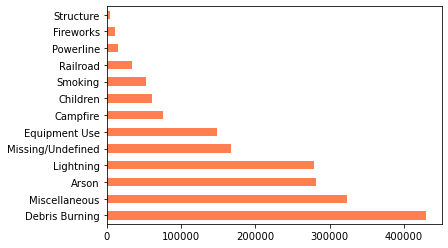

In [13]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

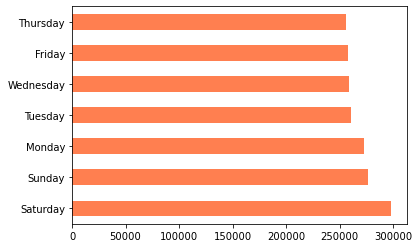

In [14]:
df['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')
plt.show()

So fires are slightly more likely to start/be discovered on the weekend. I imagine these fires are due to people being careless with campfires or smoking or possibly malicious fires, I doubt fires due natural causes such as lightning strikes would increase at the weekend. But let's test that:

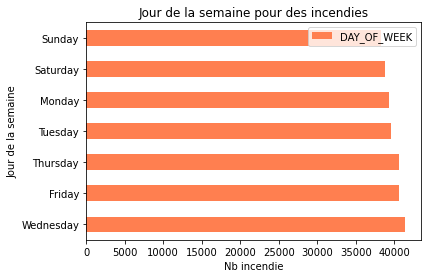

In [15]:
df_lightning = df[df['STAT_CAUSE_DESCR']=='Lightning']
df_lightning['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='coral')

#plt.show()
plt.title('Jour de la semaine pour des incendies')
plt.xlabel('Nb incendie')
plt.ylabel('Jour de la semaine')

plt.legend();